# Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [8]:
# carregar base de dados
file_path = 'hotel_bookings.csv'
hotel_data = pd.read_csv(file_path)

# verficar 5 primeiras linhas
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Análise descritiva

In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
print(hotel_data.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/guilhermebreda/Development/GitHub/AEDI/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palett

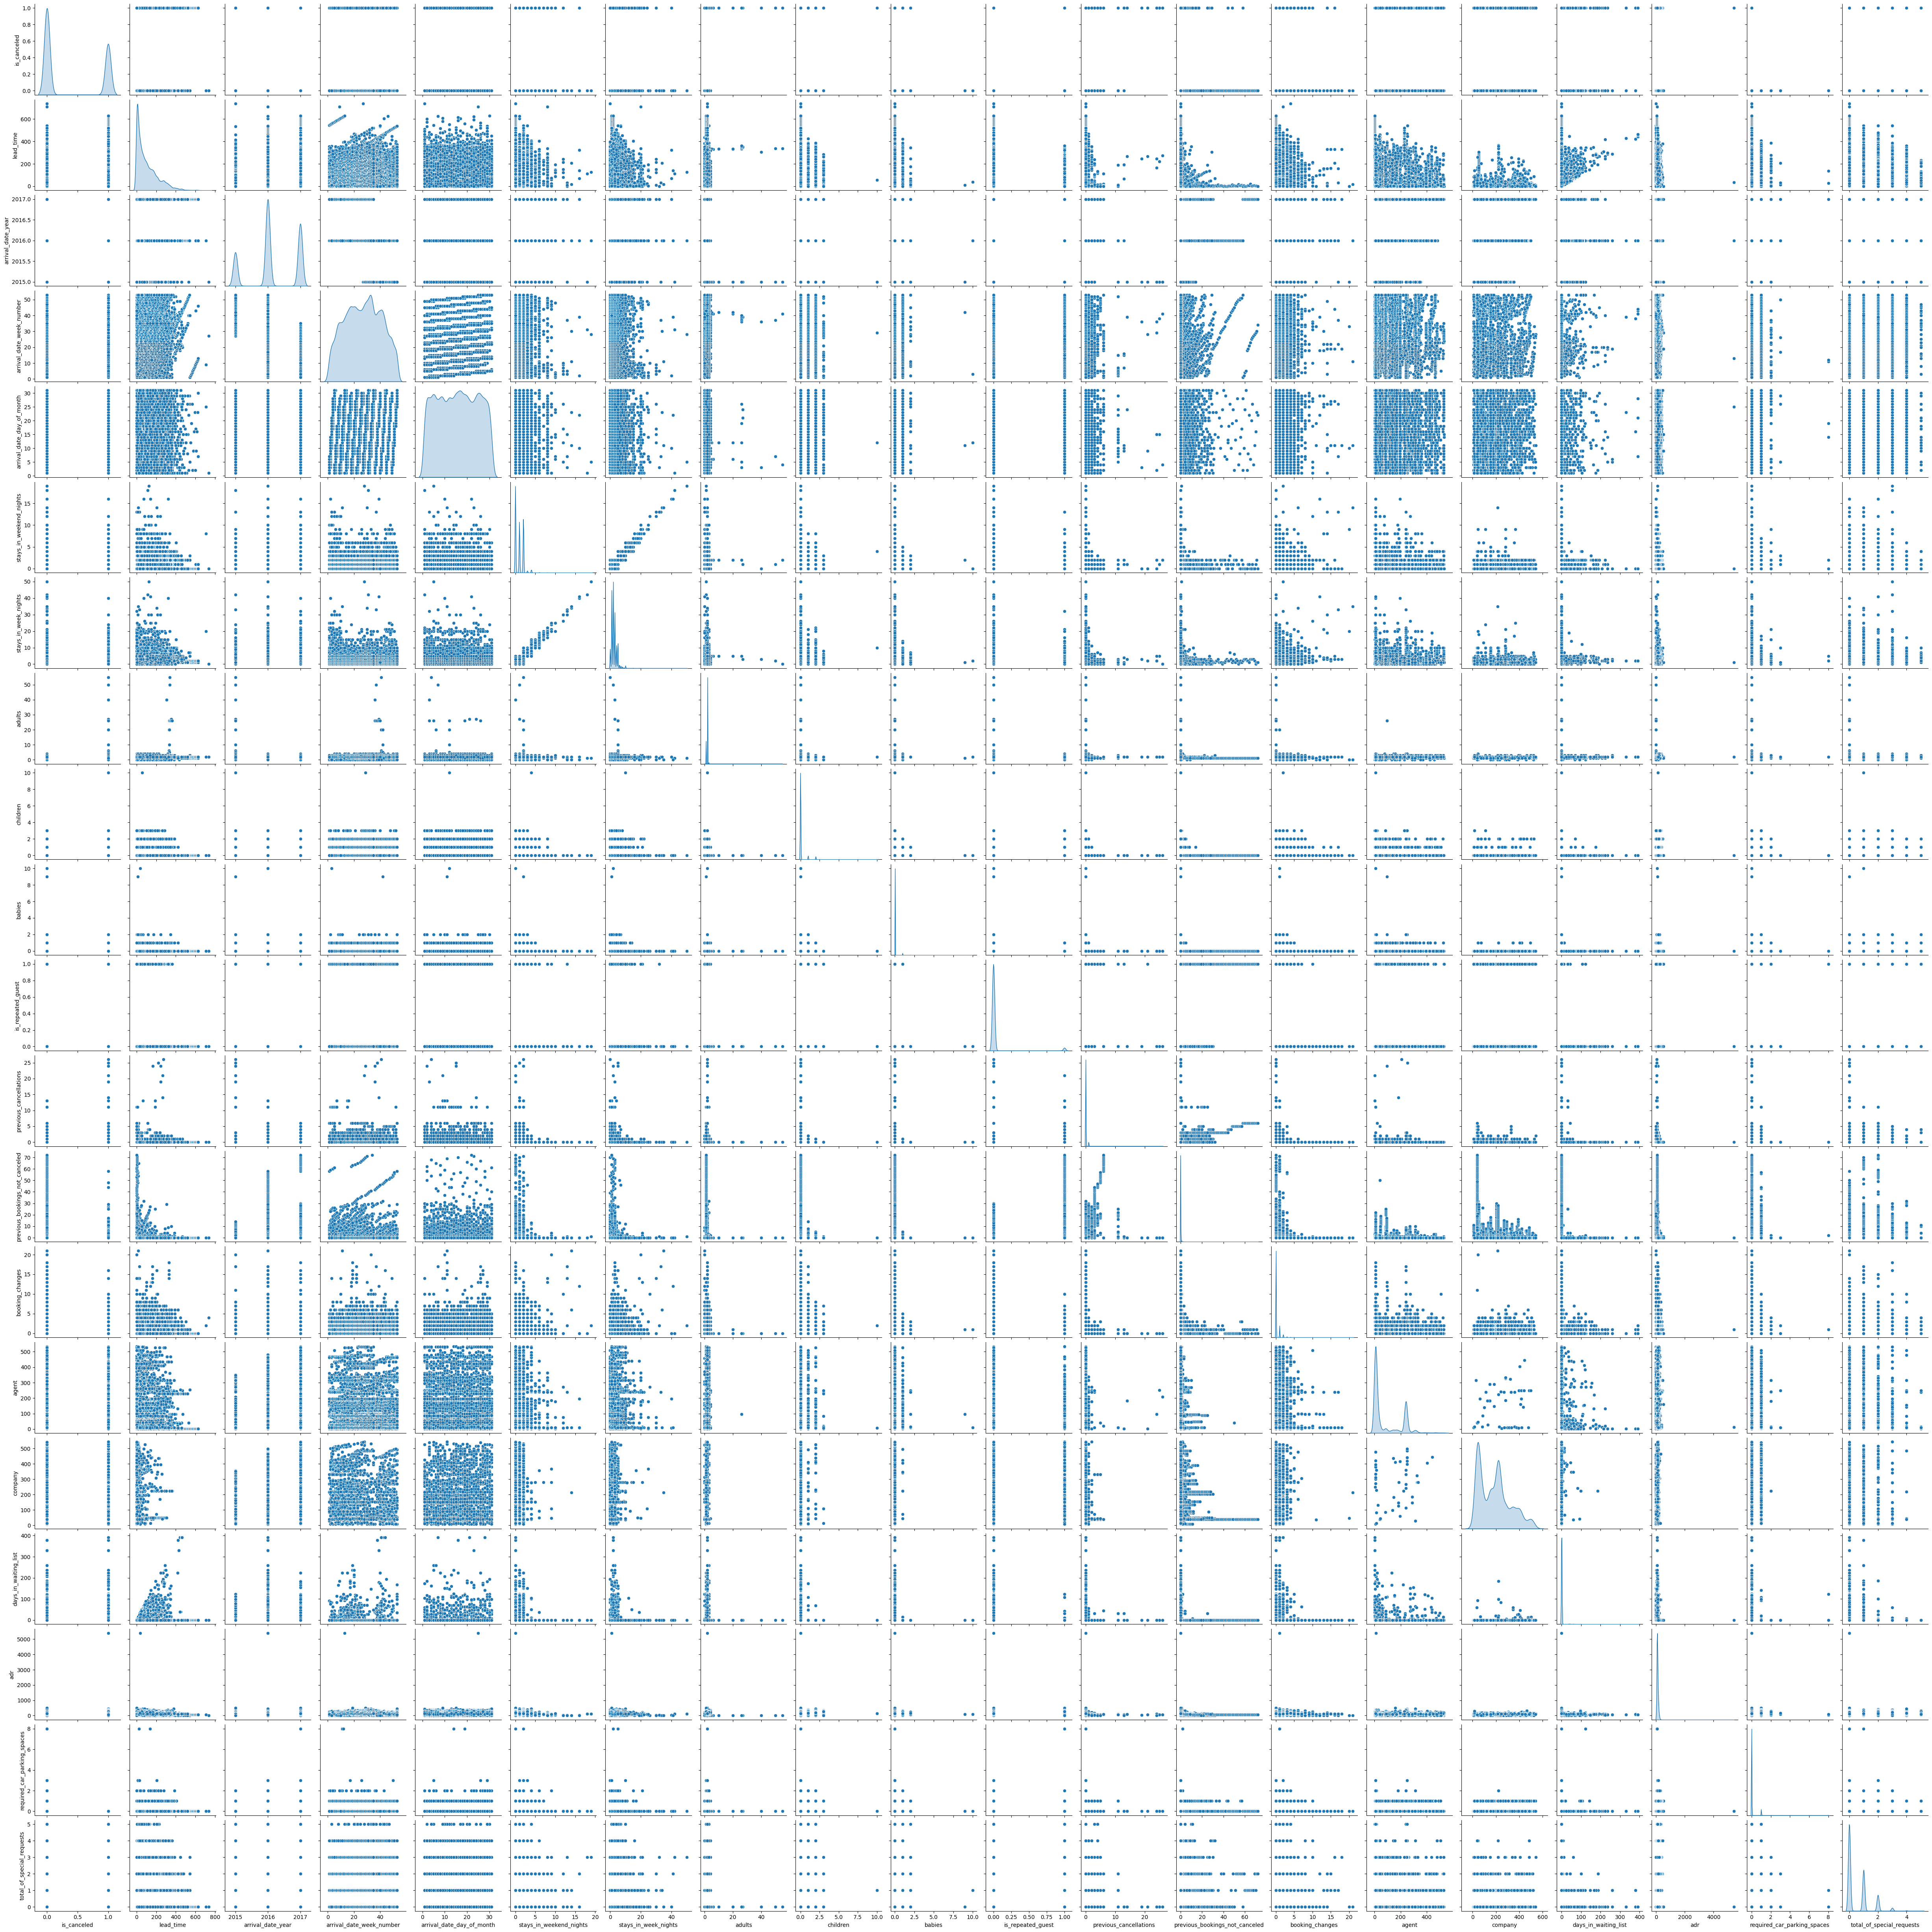

In [5]:
# Selecionar as 10 variáveis relevantes
selected_cols = ["hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month",
    "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies", "meal", "country",
    "market_segment", "distribution_channel", "is_repeated_guest",
    "previous_cancellations", "previous_bookings_not_canceled", "reserved_room_type",
    "assigned_room_type", "booking_changes", "deposit_type", "agent", "company",
    "days_in_waiting_list", "customer_type", "adr", "required_car_parking_spaces",
    "total_of_special_requests", "reservation_status", "reservation_status_date"]

# Filtrar as colunas relevantes no dataframe
filtered_data = hotel_data[selected_cols]

# Criar o pairplot com seaborn
sns.pairplot(filtered_data, diag_kind='kde', palette='Set2')
plt.show()

In [9]:
# Verificar valores ausentes
print(hotel_data.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_3626/2723392240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_canceled", data=hotel_data, palette="coolwarm")


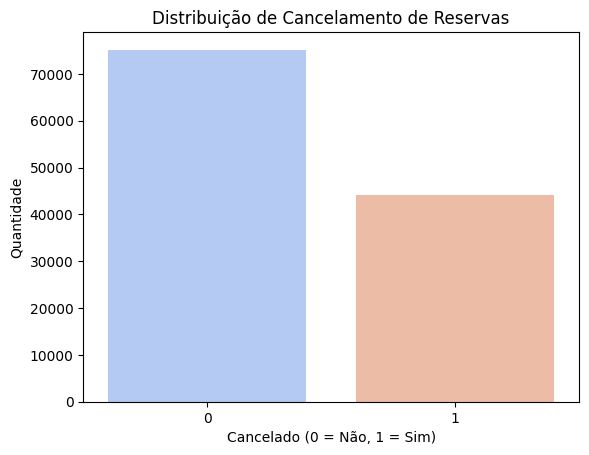

In [10]:
# Visualizar a distribuição das reservas canceladas
sns.countplot(x="is_canceled", data=hotel_data, palette="coolwarm")
plt.title("Distribuição de Cancelamento de Reservas")
plt.xlabel("Cancelado (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade")
plt.show()

## Modelo de regressão logística

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Selecionar features relevantes e a variável alvo
features = ["lead_time", "stays_in_weekend_nights", "stays_in_week_nights",
            "adults", "children", "babies", "previous_cancellations",
            "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list",
            "adr", "total_of_special_requests"]

X = hotel_data[features]
y = hotel_data["is_canceled"]

# Tratar valores ausentes preenchendo com 0 (caso children ou babies tenham NaN)
X.fillna(0, inplace=True)

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizar as variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Relatório completo
print(classification_report(y_test, y_pred))

Acurácia: 0.73
Precisão: 0.71
Recall: 0.45
F1-Score: 0.55
              precision    recall  f1-score   support

           0       0.73      0.89      0.81     15033
           1       0.71      0.45      0.55      8845

    accuracy                           0.73     23878
   macro avg       0.72      0.67      0.68     23878
weighted avg       0.73      0.73      0.71     23878



/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_3626/3181815430.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


/var/folders/vw/w4z357v90f599jyt6ljmc29w0000gn/T/ipykernel_3626/3074724728.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")


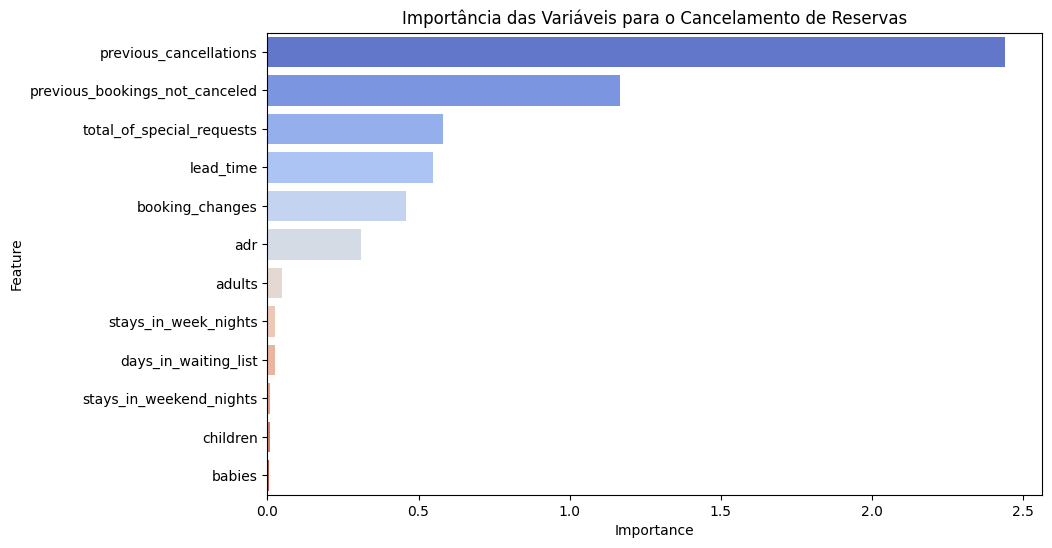

In [12]:
# Obter a importância das features a partir dos coeficientes do modelo
importance = abs(model.coef_[0])

# Criar um DataFrame para visualizar a importância das variáveis
feature_importance = pd.DataFrame({"Feature": features, "Importance": importance})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Importância das Variáveis para o Cancelamento de Reservas")
plt.show()